# ALL STRATEGIES

## NOTE 1: THIS WAS COPIED FROM COLABORATORY
## NOTE 2: ** NEED TO ONLY INCLUDE DATES WHERE ALL AVAILABLE!! **

## Install and Import

In [ ]:
from __future__ import print_function

!pip install git+https://github.com/scubamut/fintools.git
!pip install cvxopt
!pip install pyfolio
!pip install ffn
!pip install itable

!pip install git+https://github.com/pydata/pandas-datareader.git

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import itable
import ffn

from fintools.Parameters import Parameters
from fintools.set_start_end import set_start_end
from fintools.get_yahoo_prices import get_yahoo_prices
from fintools.compute_weights_RS_DM import compute_weights_RS_DM
from fintools.compute_weights_PMA import compute_weights_PMA
from fintools.endpoints import endpoints
from fintools.backtest import backtest
from fintools.monthly_return_table import monthly_return_table
from fintools.show_return_table import show_return_table
from fintools.finhelpers3 import highlight_pos_neg

## Strategy Details

In [2]:
# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until today.

# start_date = '1986-01-01'
start_date = '2000-01-01'
# end_date = '2016-12-31'
end_date = datetime.today().strftime('%Y-%m-%d')

## SELECT EITHER FUNDS OR ETFs

## FUNDS

In [4]:
portfolios = {
    'RS0001': { 'symbols': ['VCVSX','VWEHX','VFIIX','FGOVX','VWAHX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['MMHYX','FAGIX','VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,               
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0003': {'symbols': ['MMHYX','FAGIX','VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'Q',
              'cash_proxy': 'CASHX', 'risk_free': 0},    
    'DM0001': {'symbols': ['VCVSX','VWINX','VWEHX','VGHCX','VUSTX','VFIIX','VWAHX','FGOVX','FFXSX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 'FFXSX'},
    'DM0002': {'symbols': ['VCVSX','VUSTX','VWEHX','VFIIX','VGHCX','FRESX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'M',
              'cash_proxy': 'VFIIX', 'risk_free': 'FFXSX'},
    'PMA001': {'symbols': ['VCVSX', 'VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,  
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.4],
              'cash_proxy': 'VUSTX'},
    'PMA002': {'symbols': ['VCVSX', 'VWINX', 'VWEHX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.2, 0.2],
              'cash_proxy': 'VUSTX'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'risk_lookback': 2, 'frequency': 'M', 'allocations': [1./3., 1./3., 1./3.],
              'cash_proxy': 'VUSTX'}
    }

## ETFs

In [3]:
portfolios = {
    'RS0001': { 'symbols': ['CWB','HYG','MBB','IEF','HYD'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['HYD','QLTB','MBB'], 
               'prices':data_source, 'start':start_date, 'end':end_date,               
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0003': {'symbols': ['HYD','MBB','SHY'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'Q',
              'cash_proxy': 'CASHX', 'risk_free': 0},    
    'DM0001': {'symbols': ['CWB','VYM','HYG','VHT','TLT','MBB','HYD','IEF'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 'SHY'},
    'DM0002': {'symbols': ['CWB','TLT','HYG','VHT','VNQ'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'M',
              'cash_proxy': 'MBB', 'risk_free': 'SHY'},
    'PMA001': {'symbols': ['CWB','MBB'], 
               'prices':data_source, 'start':start_date, 'end':end_date,  
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.4],
              'cash_proxy': 'TLT'},
    'PMA002': {'symbols': ['CWB','VYM','HYG'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.2, 0.2],
              'cash_proxy': 'TLT'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'risk_lookback': 2, 'frequency': 'M', 'allocations': [1./3., 1./3., 1./3.],
              'cash_proxy': 'VUSTX'}
    }

## Select a strategy and run

Strategy : RS0001
FIRST BUY DATE = 2009-05-29 00:00:00



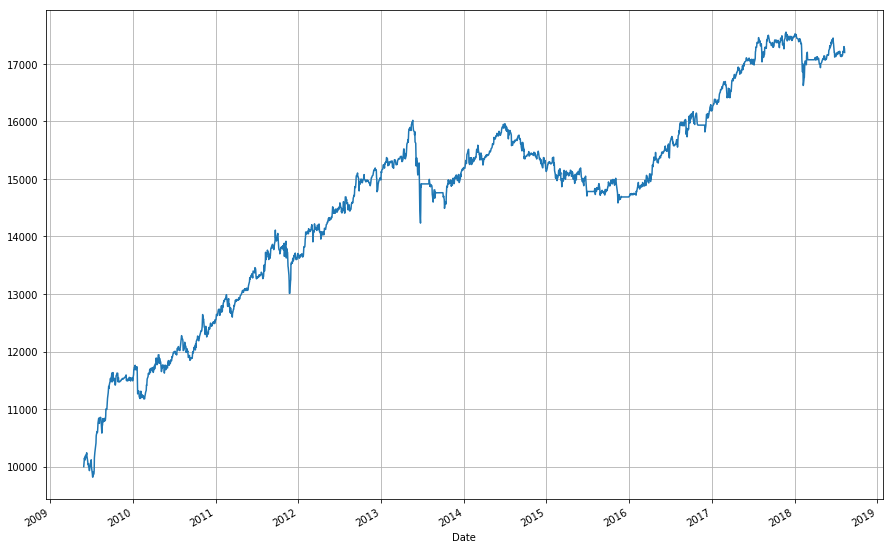

In [6]:
name = 'RS0001'

if 'PMA' in name :
    p_value, p_holdings, p_weights, prices =  compute_weights_PMA (name, portfolios[name])
else :
    p_value, p_holdings, p_weights, prices =  compute_weights_RS_DM (name, portfolios[name])
p_value.plot(figsize=(15, 10), grid=True)

## Performance Statistics

In [5]:
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-07-31 00:00:00 - 2018-07-20 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1394.16%               2  8.83%   -5.64%

Annualized Returns:
mtd    3m     6m      ytd     1y     3y     5y     10y    incep.
-----  -----  ------  ------  -----  -----  -----  -----  --------
0.83%  1.93%  -0.31%  -0.53%  0.70%  4.61%  3.78%  8.59%  8.83%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  2.00     1.72       1.35
mean    8.55%    8.60%      8.91%
vol     4.28%    5.00%      6.61%
skew    -0.07    0.51       1.60
kurt    5.60     2.58       4.63
best    1.93%    8.13%      32.82%
worst   -2.74%   -3.83%     -0.97%

Drawdowns:
max     avg       # days
------  ------  --------
-5.64%  -0.72%     21.09

Misc:
---------------  ------
avg. up month    1.36%
avg. down month  -0.81%
up year %        93.75%
12m up %         98.13%
--

## Monthly and Annual Returns

In [10]:
df = monthly_return_table (p_value)

df.style.\
    apply(highlight_pos_neg)

## Bar Plot

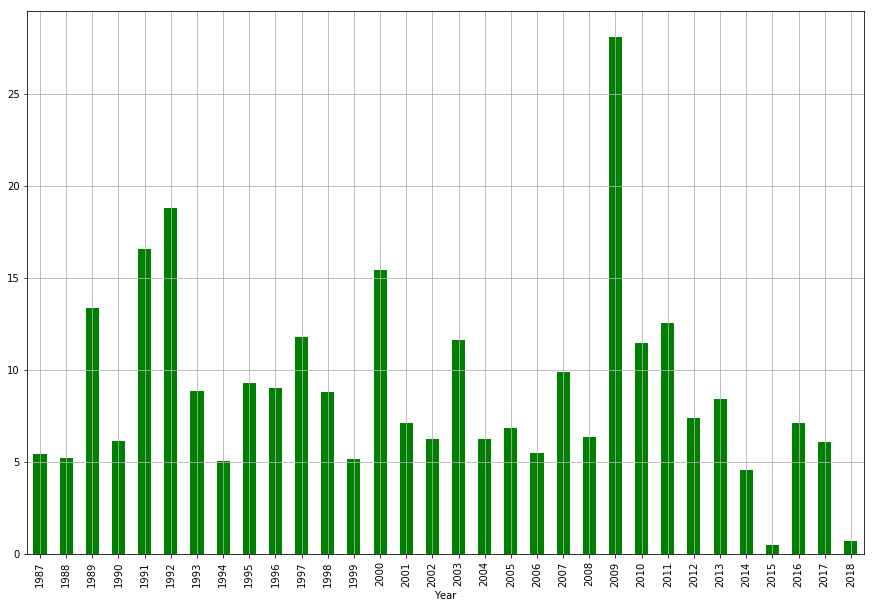

In [11]:
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# EACH STRATEGY SEPARATELY

## RS0001

Strategy : RS0001
FIRST BUY DATE = 2009-05-29 00:00:00



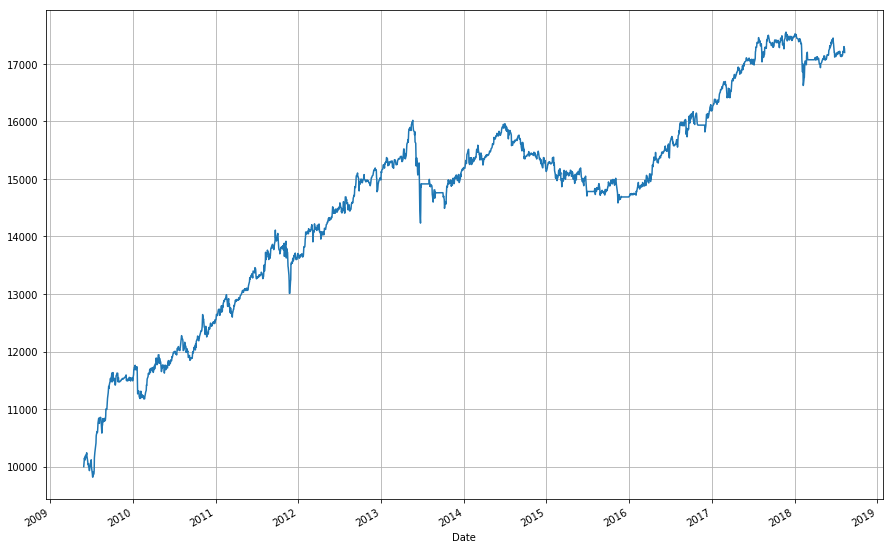

In [5]:
p_value1, p_holdings1, p_weights1, prices1  =  compute_weights_RS_DM ('RS0001', portfolios['RS0001'])
p_value1.plot(figsize=(15, 10), grid=True)

## RS0002

In [6]:
p_value2, p_holdings2, p_weights2, prices2  =  compute_weights_RS_DM ('RS0002', portfolios['RS0002'])
p_value2.plot(figsize=(15, 10), grid=True)

Strategy : RS0002


ValueError: Index contains duplicate entries, cannot reshape

## RS0003

Strategy : RS0003
FIRST BUY DATE = 1986-03-31 00:00:00



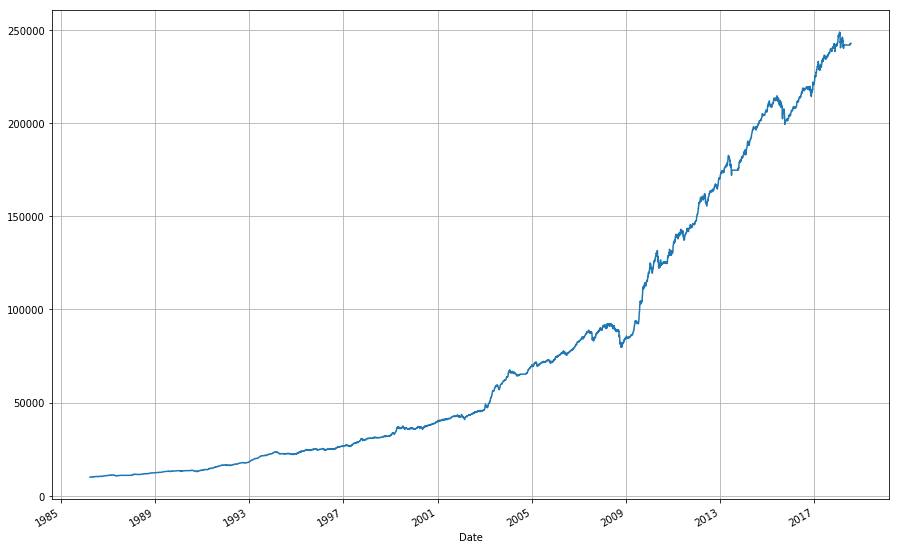

In [14]:
p_value3, p_holdings3, p_weights3, prices3  =  compute_weights_RS_DM ('RS0003', portfolios['RS0003'])
p_value3.plot(figsize=(15, 10), grid=True)

## DM0001

Strategy : DM0001
FIRST BUY DATE = 1986-12-31 00:00:00



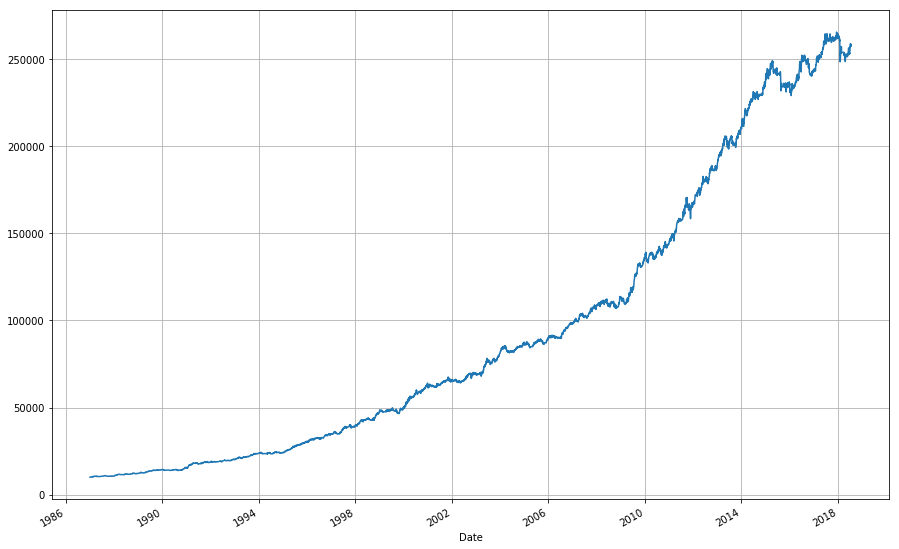

In [15]:
p_value4, p_holdings4, p_weights4, prices4  =  compute_weights_RS_DM ('DM0001', portfolios['DM0001'])
p_value4.plot(figsize=(15, 10), grid=True)

## DM0002

Strategy : DM0002
FIRST BUY DATE = 1986-12-31 00:00:00



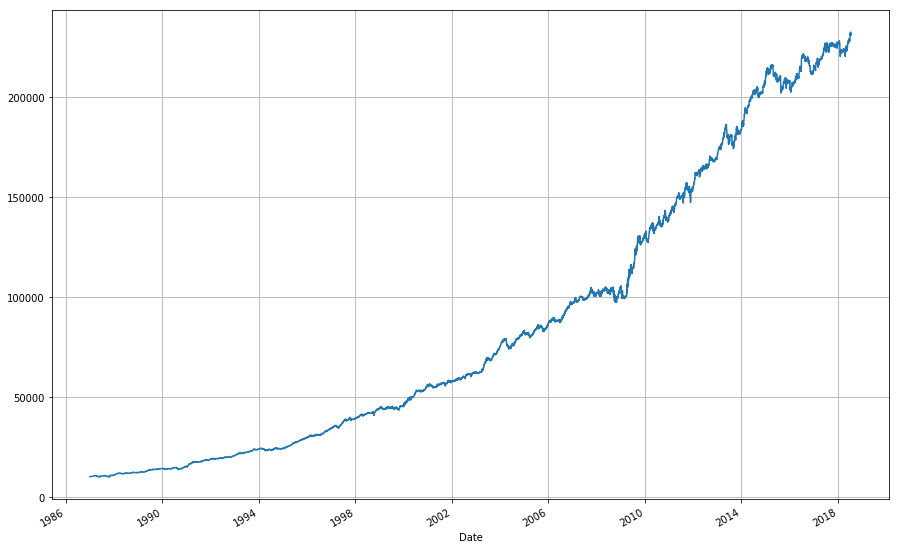

In [16]:
p_value5, p_holdings5, p_weights5, prices5  =  compute_weights_RS_DM ('DM0002', portfolios['DM0002'])
p_value5.plot(figsize=(15, 10), grid=True)

## PMA001

PMA001
FIRST BUY DATE = 1986-08-29 00:00:00



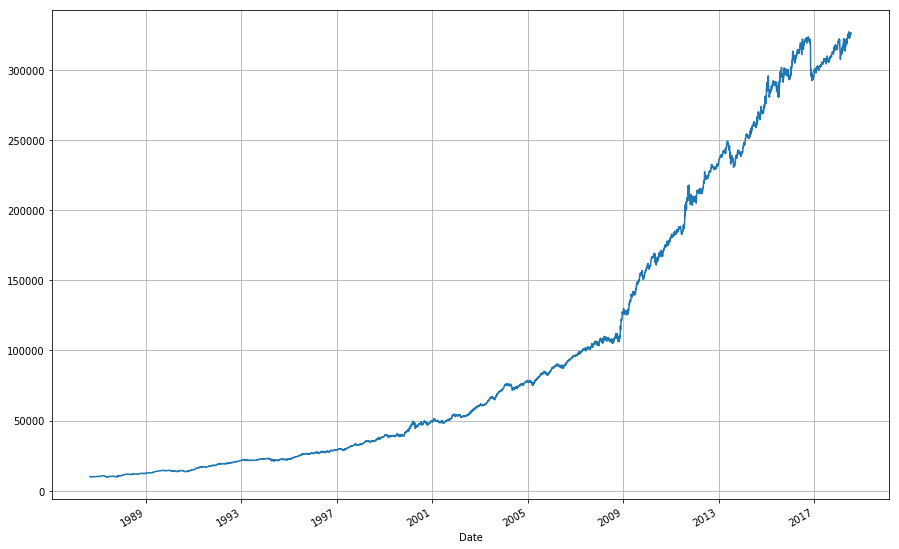

In [23]:
p_value6, p_holdings6, p_weights6, prices6  =  compute_weights_PMA ('PMA001', portfolios['PMA001'])
p_value6.plot(figsize=(15, 10), grid=True)

## PMA002

PMA002
FIRST BUY DATE = 1986-08-29 00:00:00



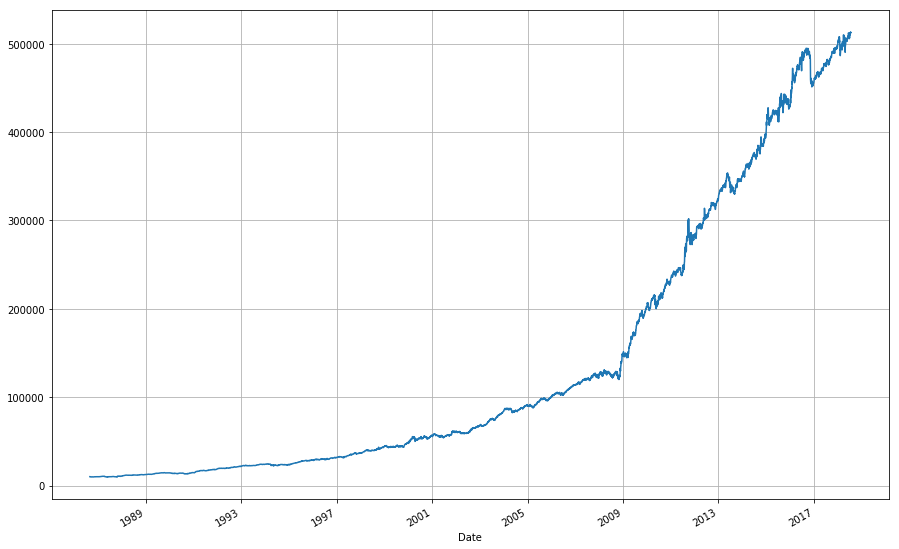

In [24]:
p_value7, p_holdings7, p_weights7, prices7  =  compute_weights_PMA ('PMA002', portfolios['PMA002'])
p_value7.plot(figsize=(15, 10), grid=True)

## PMA003

PMA003
FIRST BUY DATE = 1986-07-31 00:00:00



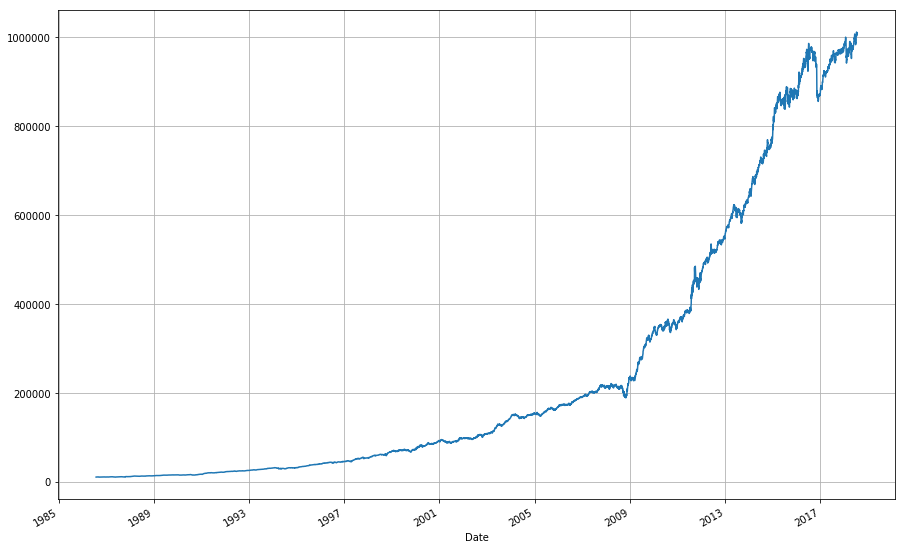

In [25]:
p_value8, p_holdings8, p_weights8, prices8  =  compute_weights_PMA ('PMA003', portfolios['PMA003'])
p_value8.plot(figsize=(15, 10), grid=True)

# MULTIPLE STRATEGIES (FUNDS)

In [26]:

strategies = {
    'DM0003': {'symbols': ['VCVSX', 'VWEHX', 'VFIIX', 'FGOVX', 'VWAHX'], 'prices': 'yahoo',
               'start': '1986-01-01', 'end': 'today',
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'M',
               'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['MMHYX', 'FAGIX', 'VFIIX'], 'prices': 'yahoo',
               'start': '1986-01-01', 'end': 'today',
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'M',
               'cash_proxy': 'CASHX', 'risk_free': 0},
    # 'RS0003': {'symbols': ['MMHYX', 'FAGIX', 'VFIIX'], 'prices': 'yahoo',
    #            'start': '1986-01-01', 'end': 'today',
    #            'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'Q',
    #            'cash_proxy': 'CASHX', 'risk_free': 0},
    # 'DM0001': {'symbols': ['VCVSX', 'VWINX', 'VWEHX', 'VGHCX', 'VUSTX', 'VFIIX', 'VWAHX', 'FGOVX', 'FFXSX'],
    #            'prices': 'yahoo', 'start': '1986-01-01', 'end': 'today',
    #            'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'M',
    #            'cash_proxy': 'CASHX', 'risk_free': 'FFXSX'},
    # 'DM0002': {'symbols': ['VCVSX', 'VUSTX', 'VWEHX', 'VFIIX', 'VGHCX', 'FRESX'], 'prices': 'yahoo',
    #            'start': '1986-01-01', 'end': 'today',
    #            'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'M',
    #            'cash_proxy': 'VFIIX', 'risk_free': 'FFXSX'},
    # 'PMA001': {'symbols': ['VCVSX', 'VFIIX'], 'prices': 'yahoo',
    #            'start': '1986-01-01', 'end': 'today',
    #            'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.4],
    #            'cash_proxy': 'VUSTX'},
    # 'PMA002': {'symbols': ['VCVSX', 'VWINX', 'VWEHX'], 'prices': 'yahoo',
    #            'start': '1986-01-01', 'end': 'today',
    #            'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.2, 0.2],
    #            'cash_proxy': 'VUSTX'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 'prices': 'yahoo',
               'start': '1986-01-01', 'end': 'today',
               'risk_lookback': 2, 'frequency': 'M', 'allocations': [1. / 3., 1. / 3., 1. / 3.],
               'cash_proxy': 'VUSTX'},
}

strategy_values = pd.DataFrame(columns=strategies.keys())
security_weights = {}
security_holdings = {}
security_prices = {}

for name in strategies:
    if 'PMA' in name:
        s_value, s_holdings, s_weights, s_prices = compute_weights_PMA(name, strategies[name])
    else:
        s_value, s_holdings, s_weights, s_prices = compute_weights_RS_DM(name, strategies[name])

    strategy_values[name] = s_value
    security_weights[name] = s_weights
    security_holdings[name] = s_holdings
    security_prices[name] = s_prices

Strategy : DM0003
FIRST BUY DATE = 1986-07-31 00:00:00

Strategy : RS0002
FIRST BUY DATE = 1986-03-31 00:00:00

PMA003
FIRST BUY DATE = 1986-07-31 00:00:00



In [27]:
strategy_values

,DM0003,RS0002,PMA003
Date,,,
1986-07-31,10000.000000,10314.114929,1.000000e+04
1986-08-01,9999.840449,10314.114929,1.000000e+04
1986-08-04,9999.840449,10293.133512,1.001984e+04
1986-08-05,9995.088996,10282.628565,9.980155e+03
1986-08-06,9985.119784,10282.628565,9.940467e+03
1986-08-07,9995.253543,10282.628565,9.970246e+03
1986-08-08,10025.011821,10303.627436,1.009921e+04
1986-08-11,10044.798437,10303.627436,1.019841e+04
1986-08-12,10054.762607,10303.627436,1.018849e+04
